<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_4/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2** (C=100)


SVR (LINEAR)
Training MSE: 1,018,417,177,162.09
Validation MSE: 1,931,069,790,675.44

SVR (POLY)
Training MSE: 392,495,165,188.51
Validation MSE: 5,774,926,272,526.91

SVR (RBF)
Training MSE: 180,367,031,857.60
Validation MSE: 2,165,824,492,871.05

SVR (SIGMOID)
Training MSE: 126,949,693,030,952,944.00
Validation MSE: 80,879,983,205,479,488.00

 Linear Regression (L2 Regularization) 
Training MSE: 499,817,639,347.91
Validation MSE: 901,299,426,654.03


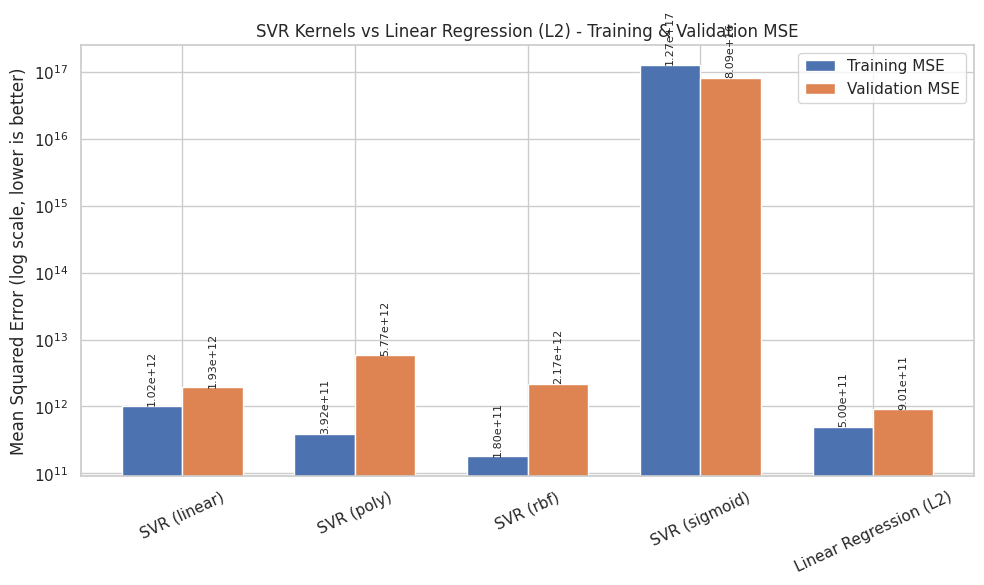


 Model Performance Comparison:
                    Model     Train MSE  Validation MSE
0            SVR (linear)  1.018417e+12    1.931070e+12
1              SVR (poly)  3.924952e+11    5.774926e+12
2               SVR (rbf)  1.803670e+11    2.165824e+12
3           SVR (sigmoid)  1.269497e+17    8.087998e+16
4  Linear Regression (L2)  4.998176e+11    9.012994e+11


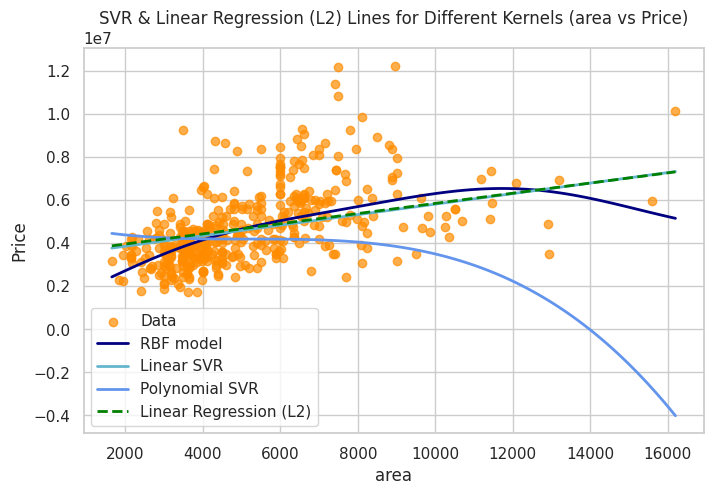

In [7]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Loading Dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Encode Yes/No → 1/0
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# Defining Features and Target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea']
target = 'price'

X = data[features].values.astype(float)
y = data[target].values.reshape(-1, 1)

# === Spliting Data (80/20) ===
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling Data for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_val_scaled = scaler_X.transform(X_val_raw)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()

# Training SVR Models with Different Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {'Model': [], 'Train MSE': [], 'Validation MSE': []}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=100, gamma='scale', epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled)

    # Predictions (scaled → unscaled)
    y_pred_train_scaled = svr.predict(X_train_scaled)
    y_pred_val_scaled = svr.predict(X_val_scaled)

    y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled.reshape(-1, 1)).ravel()

    train_mse = mean_squared_error(y_train, y_pred_train)
    val_mse = mean_squared_error(y_val, y_pred_val)

    results['Model'].append(f'SVR ({kernel})')
    results['Train MSE'].append(train_mse)
    results['Validation MSE'].append(val_mse)

    print(f"\nSVR ({kernel.upper()})")
    print(f"Training MSE: {train_mse:,.2f}")
    print(f"Validation MSE: {val_mse:,.2f}")

# Linear Regression with L2 Regularization from Homework 1
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations, lambda_l2):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses, val_losses = [], []

    for _ in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        dtheta = (1/m) * X_train.T.dot(error) + (lambda_l2 / m) * theta
        dbias = (1/m) * np.sum(error)

        theta -= alpha * dtheta
        bias -= alpha * dbias

        train_loss = (1/(2*m)) * np.sum(error**2) + (lambda_l2/(2*m)) * np.sum(theta**2)
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# Standardization for Linear Regression
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

alpha = 0.015
iterations = 5000
lambda_l2 = 3

theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val,
    alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# Using standardized losses
train_mse_linreg = train_losses_std[-1]
val_mse_linreg = val_losses_std[-1]

results['Model'].append('Linear Regression (L2)')
results['Train MSE'].append(train_mse_linreg)
results['Validation MSE'].append(val_mse_linreg)

print("\n Linear Regression (L2 Regularization) ")
print(f"Training MSE: {train_mse_linreg:,.2f}")
print(f"Validation MSE: {val_mse_linreg:,.2f}")

# === Ploting Comparison (Validation + Training) ===
results_df = pd.DataFrame(results)
plt.figure(figsize=(10,6))

x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Train MSE'], width, label='Training MSE')
plt.bar(x + width/2, results_df['Validation MSE'], width, label='Validation MSE')

plt.yscale('log')
plt.xticks(x, results_df['Model'], rotation=25)
plt.title("SVR Kernels vs Linear Regression (L2) - Training & Validation MSE")
plt.ylabel("Mean Squared Error (log scale, lower is better)")
plt.legend()

# Annotating each bar
for i in range(len(results_df)):
    plt.text(i - width/2, results_df['Train MSE'][i], f"{results_df['Train MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + width/2, results_df['Validation MSE'][i], f"{results_df['Validation MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

#  Printing Final Table
print("\n Model Performance Comparison:")
print(results_df.round(2))

#  Ploting SVR + Linear Regression Lines (for One Feature)
feature_to_plot = 'area'
feature_index = features.index(feature_to_plot)
mean_features = np.mean(X_train_scaled, axis=0)

feature_values = np.linspace(
    X_train_scaled[:, feature_index].min(),
    X_train_scaled[:, feature_index].max(),
    100
)

X_plot = np.tile(mean_features, (100, 1))
X_plot[:, feature_index] = feature_values

# Train models
svr_rbf = SVR(kernel='rbf', C=100, gamma='scale')
svr_lin = SVR(kernel='linear', C=100)
svr_poly = SVR(kernel='poly', C=100, degree=3)

svr_rbf.fit(X_train_scaled, y_train_scaled)
svr_lin.fit(X_train_scaled, y_train_scaled)
svr_poly.fit(X_train_scaled, y_train_scaled)

# Predict for SVR models
y_rbf_scaled = svr_rbf.predict(X_plot)
y_lin_scaled = svr_lin.predict(X_plot)
y_poly_scaled = svr_poly.predict(X_plot)

# Linear Regression prediction (L2)
X_plot_std = std_scaler.transform(scaler_X.inverse_transform(X_plot))
y_linreg_pred = X_plot_std.dot(theta_std) + bias_std

# Inverse transform all predictions
y_rbf = scaler_y.inverse_transform(y_rbf_scaled.reshape(-1, 1)).ravel()
y_lin = scaler_y.inverse_transform(y_lin_scaled.reshape(-1, 1)).ravel()
y_poly = scaler_y.inverse_transform(y_poly_scaled.reshape(-1, 1)).ravel()
y_linreg = y_linreg_pred.ravel()

feature_values_unscaled = scaler_X.inverse_transform(X_plot)[:, feature_index]

#  Plot Regression Lines
plt.figure(figsize=(8, 5))
plt.scatter(X_train_raw[:, feature_index], y_train, color='darkorange', label='Data', alpha=0.7)
plt.plot(feature_values_unscaled, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(feature_values_unscaled, y_lin, color='c', lw=2, label='Linear SVR')
plt.plot(feature_values_unscaled, y_poly, color='cornflowerblue', lw=2, label='Polynomial SVR')
plt.plot(feature_values_unscaled, y_linreg, color='green', lw=2, linestyle='--', label='Linear Regression (L2)')
plt.xlabel(feature_to_plot)
plt.ylabel('Price')
plt.title(f'SVR & Linear Regression (L2) Lines for Different Kernels ({feature_to_plot} vs Price)')
plt.legend()
plt.show()


**Problem 2** (C=1)


 SVR (LINEAR) 
Training MSE: 1,018,497,137,213.54
Validation MSE: 1,930,883,001,175.82

 SVR (POLY) 
Training MSE: 622,145,868,504.97
Validation MSE: 2,317,528,829,710.52

 SVR (RBF) 
Training MSE: 673,737,974,562.43
Validation MSE: 2,037,241,759,268.84

 SVR (SIGMOID) 
Training MSE: 14,595,792,941,694.96
Validation MSE: 16,057,945,544,551.43

 Linear Regression (L2 Regularization) 
Training MSE: 499,817,639,347.91
Validation MSE: 901,299,426,654.03


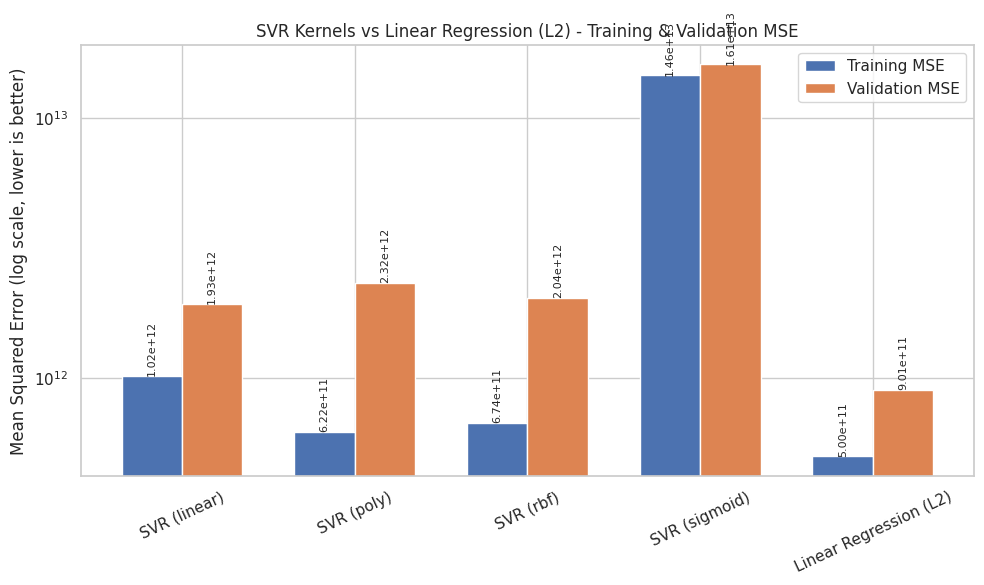


Model Performance Comparison:
                    Model     Train MSE  Validation MSE
0            SVR (linear)  1.018497e+12    1.930883e+12
1              SVR (poly)  6.221459e+11    2.317529e+12
2               SVR (rbf)  6.737380e+11    2.037242e+12
3           SVR (sigmoid)  1.459579e+13    1.605795e+13
4  Linear Regression (L2)  4.998176e+11    9.012994e+11


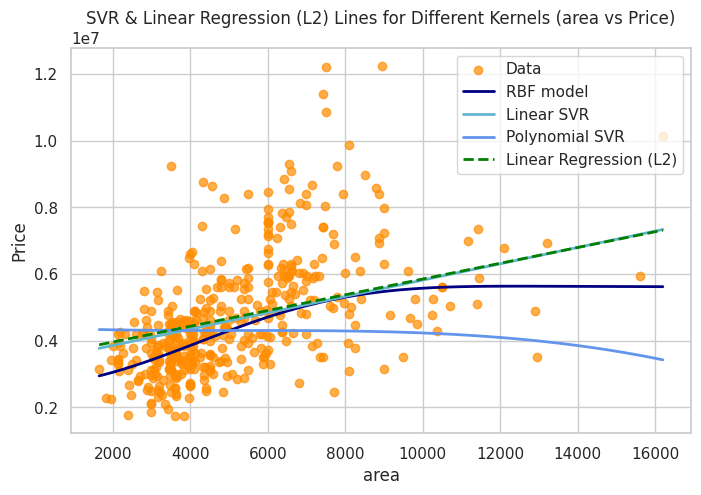

In [8]:
#  Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

#  Loading Dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Encode Yes/No → 1/0
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# Defining Features and Target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea']
target = 'price'

X = data[features].values.astype(float)
y = data[target].values.reshape(-1, 1)

#  Spliting Data (80/20)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Scaling Data for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_val_scaled = scaler_X.transform(X_val_raw)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()

# Training SVR Models with Different Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {'Model': [], 'Train MSE': [], 'Validation MSE': []}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1, gamma='scale', epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled)

    # Predictions (scaled → unscaled)
    y_pred_train_scaled = svr.predict(X_train_scaled)
    y_pred_val_scaled = svr.predict(X_val_scaled)

    y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled.reshape(-1, 1)).ravel()

    train_mse = mean_squared_error(y_train, y_pred_train)
    val_mse = mean_squared_error(y_val, y_pred_val)

    results['Model'].append(f'SVR ({kernel})')
    results['Train MSE'].append(train_mse)
    results['Validation MSE'].append(val_mse)

    print(f"\n SVR ({kernel.upper()}) ")
    print(f"Training MSE: {train_mse:,.2f}")
    print(f"Validation MSE: {val_mse:,.2f}")

#  Linear Regression with L2 Regularization from Homework 1
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations, lambda_l2):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses, val_losses = [], []

    for _ in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        dtheta = (1/m) * X_train.T.dot(error) + (lambda_l2 / m) * theta
        dbias = (1/m) * np.sum(error)

        theta -= alpha * dtheta
        bias -= alpha * dbias

        train_loss = (1/(2*m)) * np.sum(error**2) + (lambda_l2/(2*m)) * np.sum(theta**2)
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# Standardization for Linear Regression
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

alpha = 0.015
iterations = 5000
lambda_l2 = 3

theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val,
    alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# Using standardized losses
train_mse_linreg = train_losses_std[-1]
val_mse_linreg = val_losses_std[-1]

results['Model'].append('Linear Regression (L2)')
results['Train MSE'].append(train_mse_linreg)
results['Validation MSE'].append(val_mse_linreg)

print("\n Linear Regression (L2 Regularization) ")
print(f"Training MSE: {train_mse_linreg:,.2f}")
print(f"Validation MSE: {val_mse_linreg:,.2f}")

#  Ploting Comparison (Validation + Training)
results_df = pd.DataFrame(results)
plt.figure(figsize=(10,6))

x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Train MSE'], width, label='Training MSE')
plt.bar(x + width/2, results_df['Validation MSE'], width, label='Validation MSE')

plt.yscale('log')
plt.xticks(x, results_df['Model'], rotation=25)
plt.title("SVR Kernels vs Linear Regression (L2) - Training & Validation MSE")
plt.ylabel("Mean Squared Error (log scale, lower is better)")
plt.legend()

# Annotating each bar
for i in range(len(results_df)):
    plt.text(i - width/2, results_df['Train MSE'][i], f"{results_df['Train MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + width/2, results_df['Validation MSE'][i], f"{results_df['Validation MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# Printing Final Table
print("\nModel Performance Comparison:")
print(results_df.round(2))

#  Ploting SVR + Linear Regression Lines (for One Feature)
feature_to_plot = 'area'
feature_index = features.index(feature_to_plot)
mean_features = np.mean(X_train_scaled, axis=0)

feature_values = np.linspace(
    X_train_scaled[:, feature_index].min(),
    X_train_scaled[:, feature_index].max(),
    100
)

X_plot = np.tile(mean_features, (100, 1))
X_plot[:, feature_index] = feature_values

# Train models
svr_rbf = SVR(kernel='rbf', C=1, gamma='scale')
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=3)

svr_rbf.fit(X_train_scaled, y_train_scaled)
svr_lin.fit(X_train_scaled, y_train_scaled)
svr_poly.fit(X_train_scaled, y_train_scaled)

# Predict for SVR models
y_rbf_scaled = svr_rbf.predict(X_plot)
y_lin_scaled = svr_lin.predict(X_plot)
y_poly_scaled = svr_poly.predict(X_plot)

# Linear Regression prediction (L2)
X_plot_std = std_scaler.transform(scaler_X.inverse_transform(X_plot))
y_linreg_pred = X_plot_std.dot(theta_std) + bias_std

# Inverse transform all predictions
y_rbf = scaler_y.inverse_transform(y_rbf_scaled.reshape(-1, 1)).ravel()
y_lin = scaler_y.inverse_transform(y_lin_scaled.reshape(-1, 1)).ravel()
y_poly = scaler_y.inverse_transform(y_poly_scaled.reshape(-1, 1)).ravel()
y_linreg = y_linreg_pred.ravel()

feature_values_unscaled = scaler_X.inverse_transform(X_plot)[:, feature_index]

#  Plot Regression Lines
plt.figure(figsize=(8, 5))
plt.scatter(X_train_raw[:, feature_index], y_train, color='darkorange', label='Data', alpha=0.7)
plt.plot(feature_values_unscaled, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(feature_values_unscaled, y_lin, color='c', lw=2, label='Linear SVR')
plt.plot(feature_values_unscaled, y_poly, color='cornflowerblue', lw=2, label='Polynomial SVR')
plt.plot(feature_values_unscaled, y_linreg, color='green', lw=2, linestyle='--', label='Linear Regression (L2)')
plt.xlabel(feature_to_plot)
plt.ylabel('Price')
plt.title(f'SVR & Linear Regression (L2) Lines for Different Kernels ({feature_to_plot} vs Price)')
plt.legend()
plt.show()


**Problem 2** (C=0.001)


 SVR (LINEAR) 
Training MSE: 1,563,596,640,539.72
Validation MSE: 3,020,776,938,332.48

 SVR (POLY) 
Training MSE: 3,028,118,754,434.48
Validation MSE: 5,251,889,334,639.00

 SVR (RBF) 
Training MSE: 3,095,935,121,251.11
Validation MSE: 5,335,516,181,144.39

 SVR (SIGMOID) 
Training MSE: 2,942,889,533,914.52
Validation MSE: 5,115,813,824,911.13

 Linear Regression (L2 Regularization) 
Training MSE: 499,817,639,347.91
Validation MSE: 901,299,426,654.03


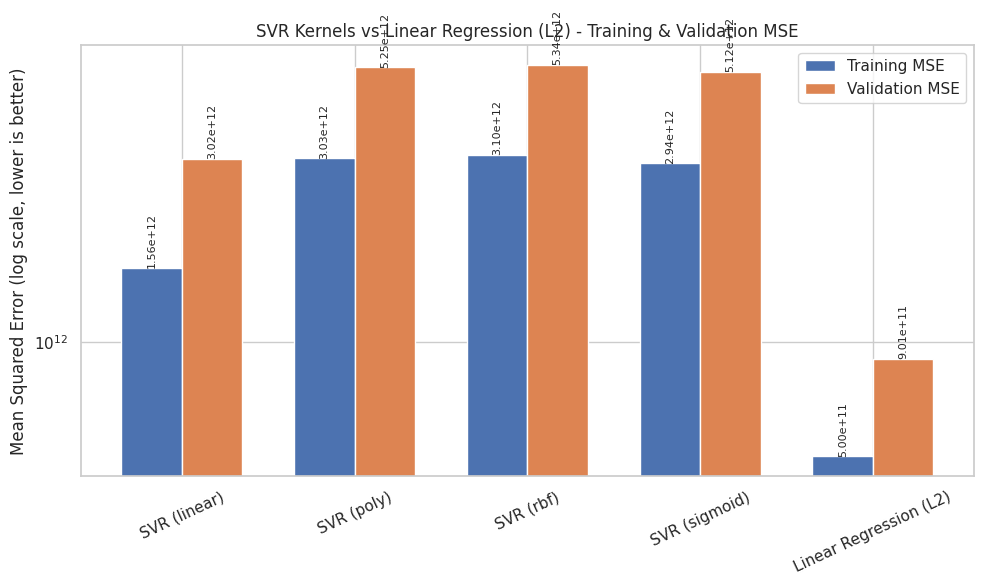


Model Performance Comparison:
                    Model     Train MSE  Validation MSE
0            SVR (linear)  1.563597e+12    3.020777e+12
1              SVR (poly)  3.028119e+12    5.251889e+12
2               SVR (rbf)  3.095935e+12    5.335516e+12
3           SVR (sigmoid)  2.942890e+12    5.115814e+12
4  Linear Regression (L2)  4.998176e+11    9.012994e+11


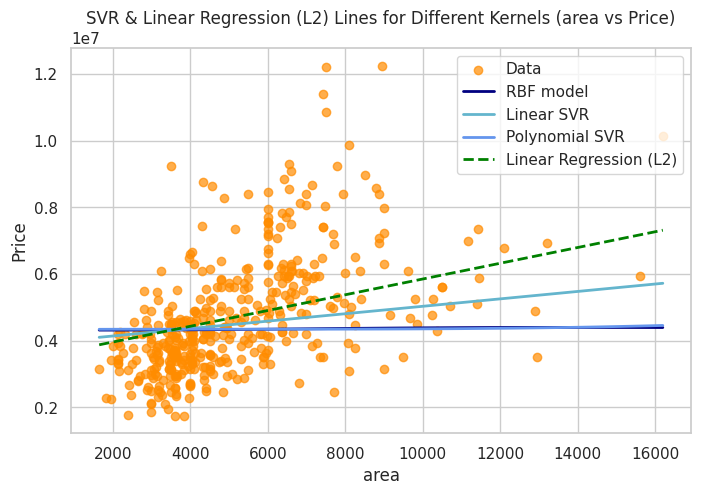

In [9]:
#  Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

#  Loading Dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Encode Yes/No → 1/0
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# Defining Features and Target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea']
target = 'price'

X = data[features].values.astype(float)
y = data[target].values.reshape(-1, 1)

# Spliting Data (80/20)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling Data for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_val_scaled = scaler_X.transform(X_val_raw)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()

# Training SVR Models with Different Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {'Model': [], 'Train MSE': [], 'Validation MSE': []}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=0.001, gamma='scale', epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled)

    # Predictions (scaled → unscaled)
    y_pred_train_scaled = svr.predict(X_train_scaled)
    y_pred_val_scaled = svr.predict(X_val_scaled)

    y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled.reshape(-1, 1)).ravel()

    train_mse = mean_squared_error(y_train, y_pred_train)
    val_mse = mean_squared_error(y_val, y_pred_val)

    results['Model'].append(f'SVR ({kernel})')
    results['Train MSE'].append(train_mse)
    results['Validation MSE'].append(val_mse)

    print(f"\n SVR ({kernel.upper()}) ")
    print(f"Training MSE: {train_mse:,.2f}")
    print(f"Validation MSE: {val_mse:,.2f}")

#  Linear Regression with L2 Regularization from Homework 1
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations, lambda_l2):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses, val_losses = [], []

    for _ in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        dtheta = (1/m) * X_train.T.dot(error) + (lambda_l2 / m) * theta
        dbias = (1/m) * np.sum(error)

        theta -= alpha * dtheta
        bias -= alpha * dbias

        train_loss = (1/(2*m)) * np.sum(error**2) + (lambda_l2/(2*m)) * np.sum(theta**2)
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# Standardization for Linear Regression
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

alpha = 0.015
iterations = 5000
lambda_l2 = 3

theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val,
    alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# Using standardized losses
train_mse_linreg = train_losses_std[-1]
val_mse_linreg = val_losses_std[-1]

results['Model'].append('Linear Regression (L2)')
results['Train MSE'].append(train_mse_linreg)
results['Validation MSE'].append(val_mse_linreg)

print("\n Linear Regression (L2 Regularization) ")
print(f"Training MSE: {train_mse_linreg:,.2f}")
print(f"Validation MSE: {val_mse_linreg:,.2f}")

# Ploting Comparison (Validation + Training)
results_df = pd.DataFrame(results)
plt.figure(figsize=(10,6))

x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Train MSE'], width, label='Training MSE')
plt.bar(x + width/2, results_df['Validation MSE'], width, label='Validation MSE')

plt.yscale('log')
plt.xticks(x, results_df['Model'], rotation=25)
plt.title("SVR Kernels vs Linear Regression (L2) - Training & Validation MSE")
plt.ylabel("Mean Squared Error (log scale, lower is better)")
plt.legend()

# Annotating each bar
for i in range(len(results_df)):
    plt.text(i - width/2, results_df['Train MSE'][i], f"{results_df['Train MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + width/2, results_df['Validation MSE'][i], f"{results_df['Validation MSE'][i]:.2e}",
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# Printing Final Table
print("\nModel Performance Comparison:")
print(results_df.round(2))

#  Ploting SVR + Linear Regression Lines (for One Feature)
feature_to_plot = 'area'
feature_index = features.index(feature_to_plot)
mean_features = np.mean(X_train_scaled, axis=0)

feature_values = np.linspace(
    X_train_scaled[:, feature_index].min(),
    X_train_scaled[:, feature_index].max(),
    100
)

X_plot = np.tile(mean_features, (100, 1))
X_plot[:, feature_index] = feature_values

# Train models
svr_rbf = SVR(kernel='rbf', C=0.001, gamma='scale')
svr_lin = SVR(kernel='linear', C=0.001)
svr_poly = SVR(kernel='poly', C=0.001, degree=3)

svr_rbf.fit(X_train_scaled, y_train_scaled)
svr_lin.fit(X_train_scaled, y_train_scaled)
svr_poly.fit(X_train_scaled, y_train_scaled)

# Predict for SVR models
y_rbf_scaled = svr_rbf.predict(X_plot)
y_lin_scaled = svr_lin.predict(X_plot)
y_poly_scaled = svr_poly.predict(X_plot)

# Linear Regression prediction (L2)
X_plot_std = std_scaler.transform(scaler_X.inverse_transform(X_plot))
y_linreg_pred = X_plot_std.dot(theta_std) + bias_std

# Inverse transform all predictions
y_rbf = scaler_y.inverse_transform(y_rbf_scaled.reshape(-1, 1)).ravel()
y_lin = scaler_y.inverse_transform(y_lin_scaled.reshape(-1, 1)).ravel()
y_poly = scaler_y.inverse_transform(y_poly_scaled.reshape(-1, 1)).ravel()
y_linreg = y_linreg_pred.ravel()

feature_values_unscaled = scaler_X.inverse_transform(X_plot)[:, feature_index]

#  Plot Regression Lines
plt.figure(figsize=(8, 5))
plt.scatter(X_train_raw[:, feature_index], y_train, color='darkorange', label='Data', alpha=0.7)
plt.plot(feature_values_unscaled, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(feature_values_unscaled, y_lin, color='c', lw=2, label='Linear SVR')
plt.plot(feature_values_unscaled, y_poly, color='cornflowerblue', lw=2, label='Polynomial SVR')
plt.plot(feature_values_unscaled, y_linreg, color='green', lw=2, linestyle='--', label='Linear Regression (L2)')
plt.xlabel(feature_to_plot)
plt.ylabel('Price')
plt.title(f'SVR & Linear Regression (L2) Lines for Different Kernels ({feature_to_plot} vs Price)')
plt.legend()
plt.show()
